# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
# Fetch current BTC price
# YOUR CODE HERE!
response_btc = requests.get(btc_url).json()
print(json.dumps(response_btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19148406,
            "total_supply": 19148406,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 21737.0,
                    "volume_24h": 35952302160,
                    "market_cap": 416615688627,
                    "percentage_change_1h": 0.0341055306243438,
                    "percentage_change_24h": 0.512535654446761,
                    "percentage_change_7d": 8.79551135368242,
                    "percent_change_1h": 0.0341055306243438,
                    "percent_change_24h": 0.512535654446761,
                    "percent_change_7d": 8.79551135368242
                },
                "CAD": {
                    "price": 28312.4425,
                    "volume_24h": 46827873563.4,
                    "m

In [15]:
btc_price = float(response_btc['data']['1']['quotes']['USD']['price'])
btc_price

21737.0

In [12]:
# Fetch current ETH price
# YOUR CODE HERE!
response_eth = requests.get(eth_url).json()
print(json.dumps(response_eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120481408,
            "total_supply": 120481408,
            "max_supply": 120481408,
            "quotes": {
                "USD": {
                    "price": 1726.8,
                    "volume_24h": 13371778798,
                    "market_cap": 208143105531,
                    "percentage_change_1h": 0.0531167524495349,
                    "percentage_change_24h": -2.34167031723474,
                    "percentage_change_7d": 9.36356109340972,
                    "percent_change_1h": 0.0531167524495349,
                    "percent_change_24h": -2.34167031723474,
                    "percent_change_7d": 9.36356109340972
                },
                "CAD": {
                    "price": 2249.157,
                    "volume_24h": 17416741884.395,
            

In [16]:
eth_price = float(response_eth['data']['1027']['quotes']['USD']['price'])
eth_price

1726.8

In [17]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
my_crypto_value = (my_btc_value) + (my_eth_value)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $26084.40
The current value of your 5.3 ETH is $9152.04


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [18]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [19]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [20]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [21]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-09-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-09-09 04:00:00+00:00,99.99,100.13,99.73,99.78,7468304,21954,99.883026,AGG
2022-09-09 04:00:00+00:00,402.77,407.51,402.46,406.60,76514124,483283,405.485840,SPY


In [22]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

In [23]:
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                             \
                            open    high    low  close   volume trade_count   
timestamp                                                                     
2022-09-09 04:00:00+00:00  99.99  100.13  99.73  99.78  7468304       21954   

                                         SPY                                   \
                                vwap    open    high     low  close    volume   
timestamp                                                                       
2022-09-09 04:00:00+00:00  99.883026  402.77  407.51  402.46  406.6  76514124   

                                                  
                          trade_count       vwap  
timestamp                                         
2022-09-09 04:00:00+00:00      483283  405.48584

In [24]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.78
Current SPY closing price: $406.6


In [25]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
my_shares_value = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20330.00
The current value of your 200 AGG shares is $19956.00


### Savings Health Analysis

In [26]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame({"amount" : [my_crypto_value, my_shares_value]}, index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,35236.44
shares,40286.00


<AxesSubplot:ylabel='amount'>

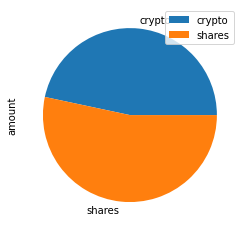

In [27]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount')

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = my_crypto_value + my_shares_value
difference = emergency_fund - total_savings

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached the necessary amount for your emergency fund.")
else:
    print(f"You are ${difference:0.2f} away from reaching your target emergency fund of ${emergency_fund:0.2f}")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [30]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-09-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-09', tz='America/New_York').isoformat()

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-11 04:00:00+00:00  110.27  110.29  110.10  110.14  2492743   
2017-09-12 04:00:00+00:00  110.04  110.06  109.92  109.98  2403562   
2017-09-13 04:00:00+00:00  110.00  110.04  109.86  109.87  1304102   
2017-09-14 04:00:00+00:00  109.81  109.97  109.81  109.93  1704216   
2017-09-15 04:00:00+00:00  110.00  110.04  109.86  109.91  2818046   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-09-11 04:00:00+00:00       10614  110.194231  248.04  249.30  248.02   
2017-09-12 04:00:00+00:00        8614  109.979269  249.64  250.09  249.42   
2017-09-13 04:00:00+00:00        6565  109.926598  249.73  250.21  249.59   
2017-09-14 04:00:00+00:00        7111  109.914840  249.83  250.32  249.60   
2017-09-15 04:00:00+00:00        7997  109.928798  248.70  249.29  248.57   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-09-11 04:00:00+00:00  249.21  71364848      211601  248.758253  
2017-09-12 04:00:00+00:00  250.05  56896027      192649  249.791314  
2017-09-13 04:00:00+00:00  250.17  59228002      147055  250.040408  
2017-09-14 04:00:00+00:00  250.09  95446349      188794  250.052841  
2017-09-15 04:00:00+00:00  249.19  95432382      186880  249.026860

In [32]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
monte_carlo = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [33]:
# Printing the simulation input data
# YOUR CODE HERE!
monte_carlo.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-11 04:00:00+00:00  110.27  110.29  110.10  110.14  2492743   
2017-09-12 04:00:00+00:00  110.04  110.06  109.92  109.98  2403562   
2017-09-13 04:00:00+00:00  110.00  110.04  109.86  109.87  1304102   
2017-09-14 04:00:00+00:00  109.81  109.97  109.81  109.93  1704216   
2017-09-15 04:00:00+00:00  110.00  110.04  109.86  109.91  2818046   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-11 04:00:00+00:00       10614  110.194231          NaN  248.04   
2017-09-12 04:00:00+00:00        8614  109.979269    -0.001453  249.64   
2017-09-13 04:00:00+00:00        6565  109.926598    -0.001000  249.73   
2017-09-14 04:00:00+00:00        7111  109.914840     0.000546  249.83   
2017-09-15 04:00:00+00:00        7997  109.928798    -0.000182  248.70   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-09-11 04:00:00+00:00  249.30  248.02  249.21  71364848      211601   
2017-09-12 04:00:00+00:00  250.09  249.42  250.05  56896027      192649   
2017-09-13 04:00:00+00:00  250.21  249.59  250.17  59228002      147055   
2017-09-14 04:00:00+00:00  250.32  249.60  250.09  95446349      188794   
2017-09-15 04:00:00+00:00  249.29  248.57  249.19  95432382      186880   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-11 04:00:00+00:00  248.758253          NaN  
2017-09-12 04:00:00+00:00  249.791314     0.003371  
2017-09-13 04:00:00+00:00  250.040408     0.000480  
2017-09-14 04:00:00+00:00  250.052841    -0.000320  
2017-09-15 04:00:00+00:00  249.026860    -0.003599

In [34]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
monte_carlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Viktoriya\Desktop\HOMEWORK\Module 5 Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002875,1.008365,1.000263,1.013150,1.003895,1.003791,1.005154,0.984381,0.997756,0.992261,...,0.996564,1.000254,1.005336,0.990176,1.002197,1.002803,0.997187,1.009803,1.001945,0.998069
2,1.016760,1.000122,1.008770,1.011203,0.999368,1.005908,0.983626,0.996249,0.998212,0.998604,...,0.986776,1.005084,0.997712,0.989235,0.999926,1.004303,0.996624,1.003473,1.005395,0.993840
3,1.026709,1.015910,1.020582,1.015107,0.996552,1.003255,0.985720,0.994278,0.988366,1.011624,...,0.990520,0.997004,0.995493,0.991580,1.004983,1.001769,0.985858,1.012045,1.007407,0.998087
4,1.030259,1.019061,1.016610,1.029555,1.002310,0.996780,0.992265,0.983144,0.984732,1.013228,...,0.971884,1.006236,0.993497,0.999230,1.010222,1.001419,0.988535,1.015017,1.014279,0.993992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.720137,13.607933,7.705192,3.485781,2.551101,13.060096,13.713033,21.985781,2.872902,7.550160,...,6.336869,9.695869,17.493272,5.087932,6.383544,6.851778,1.768463,15.884753,18.835011,0.888350
7557,3.792684,13.745895,7.579845,3.518129,2.555634,13.075967,13.734908,22.080888,2.881943,7.526322,...,6.315296,9.818404,17.832811,5.137409,6.441898,6.933481,1.798430,15.874399,18.996487,0.877687
7558,3.781872,13.754252,7.675825,3.451525,2.583904,12.914809,13.780642,21.965685,2.902328,7.470165,...,6.327773,9.867225,17.773554,5.179690,6.540928,6.946561,1.794204,15.943201,19.156946,0.870146
7559,3.761931,13.924385,7.651728,3.438057,2.565141,12.945244,13.942771,21.794567,2.921330,7.370926,...,6.356098,9.919478,17.791772,5.251551,6.502187,6.888512,1.778866,16.006859,19.114515,0.865520


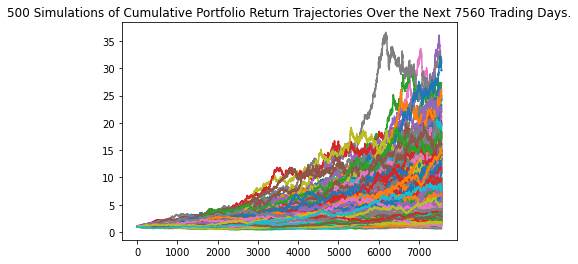

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = monte_carlo.plot_simulation()

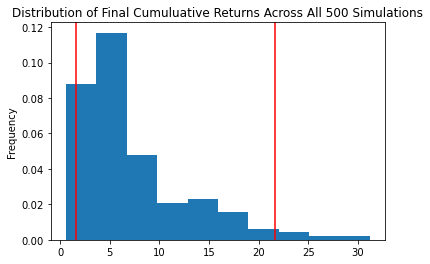

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = monte_carlo.plot_distribution()

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stat_tbl = monte_carlo.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stat_tbl)

count           500.000000
mean              7.221008
std               5.456605
min               0.572893
25%               3.508744
50%               5.355202
75%               9.113023
max              31.223510
95% CI Lower      1.555678
95% CI Upper     21.658851
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(stat_tbl[9]*initial_investment,2)
ci_upper = round(stat_tbl[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $404834.62 and $28799.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [45]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(stat_tbl[9]*initial_investment,2)
ci_upper = round(stat_tbl[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $607251.93 and $43199.1


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
monte_carlo_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [41]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
monte_carlo_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Viktoriya\Desktop\HOMEWORK\Module 5 Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002472,1.012083,1.005972,1.000126,0.992634,0.999406,0.997942,0.993863,1.000316,1.011899,...,1.016587,1.002346,1.001327,1.013642,0.987566,0.984540,0.990598,0.993975,1.007301,1.003067
2,1.020864,1.007478,1.006585,1.007547,0.990601,1.005369,0.992882,0.991380,1.018212,1.007965,...,1.022463,1.007821,0.996985,1.007591,0.985819,0.995434,0.992384,1.005957,1.013311,1.002487
3,1.013169,1.018836,1.000821,0.995710,0.980363,0.990211,0.999074,0.990177,1.008991,1.004221,...,1.023163,1.009441,0.981773,1.021432,0.989153,0.996318,1.009267,1.007265,1.005283,1.001501
4,1.011586,1.021178,1.008308,0.992586,0.988955,0.986532,1.011066,0.994539,1.022985,1.004987,...,1.029303,1.009594,0.983007,1.017868,0.992487,0.998167,1.013087,1.013466,1.009053,0.997306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,23.098865,4.631131,6.167959,4.446157,10.025804,1.916436,2.418590,5.295629,5.384529,5.418339,...,12.264033,14.530859,3.311391,3.723810,5.998806,2.883605,4.776097,3.920875,5.223125,7.685127
7557,23.280865,4.608086,6.180571,4.477403,10.063164,1.911778,2.426151,5.343487,5.348299,5.448887,...,12.183875,14.320473,3.307298,3.726057,5.980274,2.908891,4.682581,3.896257,5.198745,7.707829
7558,23.275759,4.654713,6.135715,4.503758,10.055490,1.897318,2.398520,5.350461,5.384184,5.410311,...,12.211231,14.360933,3.366390,3.716801,5.957653,2.892678,4.717803,3.886319,5.220484,7.748132
7559,23.113361,4.677156,6.133746,4.524558,10.037082,1.899862,2.403899,5.381040,5.337424,5.424938,...,12.195933,14.510659,3.394890,3.711378,5.884757,2.842946,4.732867,3.948210,5.273769,7.770314


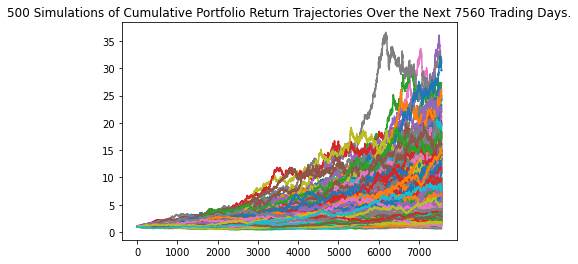

In [42]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_5 = monte_carlo_5.plot_simulation()

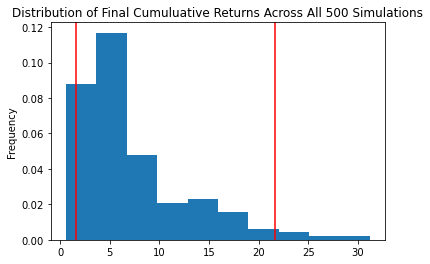

In [43]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_5 = monte_carlo_5.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stat_tbl_5 = monte_carlo_5.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stat_tbl_5)

count           500.000000
mean              7.221008
std               5.456605
min               0.572893
25%               3.508744
50%               5.355202
75%               9.113023
max              31.223510
95% CI Lower      1.555678
95% CI Upper     21.658851
Name: 7560, dtype: float64


In [51]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_upper_five = round(stat_tbl_5[9]*initial_investment,2)
ci_lower_five = round(stat_tbl_5[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $31113.56 and $433177.01


### Ten Years Retirement Option

In [52]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
monte_carlo_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [54]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
monte_carlo_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Viktoriya\Desktop\HOMEWORK\Module 5 Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005871,0.999222,0.991997,1.007339,0.996883,0.991515,1.008131,1.013200,1.001917,1.000526,...,0.998831,1.001952,1.010732,1.011637,0.999042,0.997899,1.004469,1.005170,0.993986,0.999257
2,1.004276,1.004412,0.999141,1.005382,0.998331,0.983900,1.023736,1.022211,0.999621,0.997965,...,0.991649,1.012538,1.012015,0.997961,1.004394,0.992932,0.991009,1.000288,0.992628,1.001028
3,1.010073,0.988827,0.993196,1.007918,0.994631,0.988512,1.027162,1.020997,0.994066,0.979366,...,0.993041,1.003624,1.012467,0.999477,0.995363,0.990943,0.983842,0.995850,0.987010,1.001004
4,1.006260,0.985364,0.985424,1.018930,1.002047,0.992933,1.022590,1.017054,0.999044,0.979065,...,1.006138,0.997503,1.028467,0.996633,0.996373,0.998816,0.981539,0.994992,0.971162,0.995420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.095062,1.541382,2.802344,2.923774,1.973774,1.429328,1.835835,1.554399,1.476241,1.283868,...,3.339988,0.794295,2.030979,0.974824,1.985363,1.150569,1.649681,0.842865,1.341975,1.995294
2517,2.130171,1.566291,2.807990,2.956123,1.990127,1.427305,1.822160,1.549715,1.486694,1.271401,...,3.272638,0.797713,2.018232,0.978237,1.984252,1.142009,1.648849,0.834853,1.334303,2.001304
2518,2.116104,1.560358,2.776349,2.971192,1.983753,1.425991,1.817193,1.546102,1.475377,1.262698,...,3.268341,0.798621,2.028290,0.984515,1.985968,1.141525,1.668204,0.839261,1.335928,1.995850
2519,2.120314,1.538696,2.793502,2.981797,1.986886,1.435886,1.804689,1.540316,1.476463,1.274280,...,3.269064,0.792275,2.054178,0.994143,2.000623,1.133880,1.651193,0.840623,1.348723,1.979680


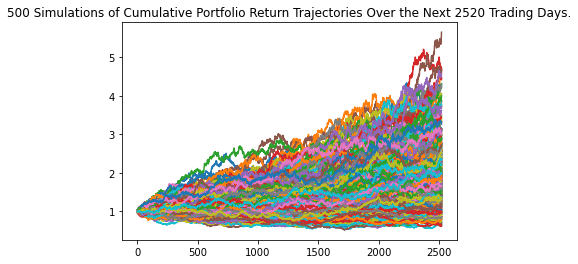

In [55]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10 = monte_carlo_10.plot_simulation()

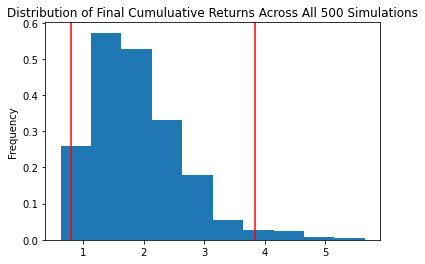

In [56]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_10 = monte_carlo_10.plot_distribution()

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stat_tbl_10 = monte_carlo_10.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stat_tbl_10)

count           500.000000
mean              1.906456
std               0.760734
min               0.625137
25%               1.359682
50%               1.819043
75%               2.296419
max               5.654697
95% CI Lower      0.805206
95% CI Upper      3.846548
Name: 2520, dtype: float64


In [58]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_upper_ten = round(stat_tbl_10[9]*initial_investment,2)
ci_lower_ten = round(stat_tbl_10[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $16104.12 and $76930.95
